In [1]:
from scipy import signal
def lowpass_filt(t,noisy_signal):
    fs = 100 # Sampling frequency

    fc = 10 # Cut-off frequency of the filter
    w = fc / (fs / 2) # Normalize the frequency
    b, a = signal.butter(3, w, 'low')
    y = signal.filtfilt(b, a, noisy_signal)
 
    
    plt.figure
    plt.ylim(0,400)
    plt.xlim(150,200)
    plt.ylabel('Volt(1/1024V)')
    plt.xlabel('Time(s)')

    plt.plot(t, noisy_signal,'lightseagreen')
    plt.plot(t,y, 'palevioletred',alpha=0.8)
    plt.legend(('noisy signal', 'filtfilt'), loc='best')
    plt.show()
    
    return y
    


In [17]:
%matplotlib inline
import numpy as np
import pandas as pd
import re as re
import sklearn
import seaborn as sns
import matplotlib as plt
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os.path
import csv
import math
import matplotlib.pyplot as plt
import matplotlib

plt.style.use('ggplot') 
font = {'family' : 'AppleGothic'}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.figsize'] = (19.2, 10.8)
#matplotlib.rcParams['figure.figsize'] = (10,10)

#plt.rcParams['font.family'] = 'Times New Roman' #全体のフォントを設定
plt.rcParams['font.family'] = 'IPAPGothic'
plt.rcParams['font.size'] = 26 #フォントサイズを設定
plt.rcParams['axes.linewidth'] = 1.5 #軸の太さを設定。目盛りは変わらない


df = pd.read_csv(os.path.join(os.getcwd(),'data/TRAIN02.TSV'), delim_whitespace=True)

df["Time"] = df["Time"] / 1000
df.index = df.Time


df.tail()

,Time,Volt
Time,,
775.968,775.968,19
775.991,775.991,21
776.014,776.014,20
776.037,776.037,19
776.060,776.060,21


/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


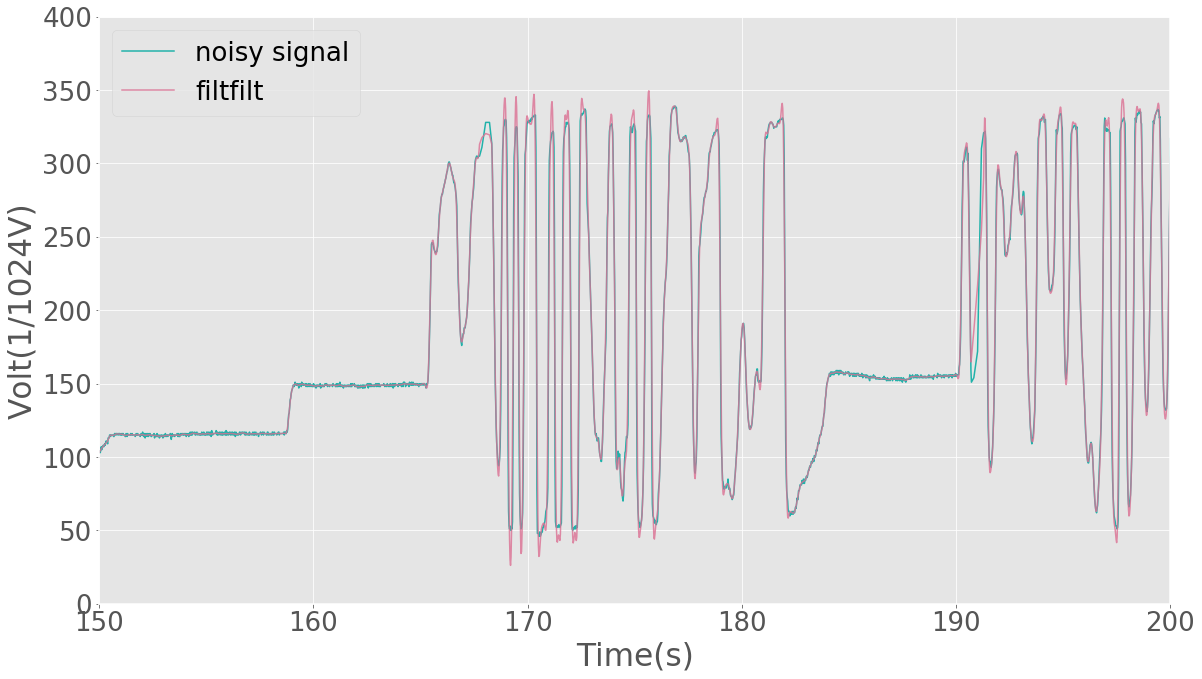

In [19]:
df["Filterd"] = lowpass_filt(df.index,df["Volt"])

In [20]:
X = pd.DataFrame([330,60])
min = 0
max = 5
y = pd.DataFrame([min,max])


In [21]:
from sklearn.preprocessing import PolynomialFeatures
regr = LinearRegression()
regr.fit(X, y)
y_fit = regr.predict(X)


In [22]:
dist_func = lambda x: x * regr.coef_ + regr.intercept_
df["Dist"] = df["Filterd"].map(dist_func)
df["Dist"] = df["Dist"].values
df["Dist"] = df["Dist"].map(lambda x : min if x < min else (max if x > max else x))
df["Theta"] = df["Dist"].map(lambda x : math.degrees(math.acos(x/5.5)))
df["Angle"] = df["Theta"].map(lambda x : x*x/90)
df["Diff"] = df["Angle"].diff()

df["Fabs"] = np.fabs(df["Diff"])
df["Sum"] = df["Fabs"].cumsum()

In [23]:
df.iloc[4000:5000,:]

,Time,Volt,Filterd,Dist,Theta,Angle,Diff,Fabs,Sum
Time,,,,,,,,,
96.814,96.814,330,335.386481,0,90.000000,90.000000,0.000000,0.000000,3818.729492
96.837,96.837,330,335.675935,0,90.000000,90.000000,0.000000,0.000000,3818.729492
96.860,96.860,330,333.728509,0,90.000000,90.000000,0.000000,0.000000,3818.729492
96.883,96.883,328,327.373619,[[0.04863668356586803]],89.493325,88.989502,-1.010498,1.010498,3819.739990
96.906,96.906,322,314.511534,[[0.2868234447957807]],87.010685,84.120660,-4.868843,4.868843,3824.608833
96.929,96.929,315,294.032306,[[0.6660684122408949]],83.044216,76.626020,-7.494640,7.494640,3832.103472
96.952,96.952,275,266.542026,[[1.175147671539202]],77.662887,67.016934,-9.609086,9.609086,3841.712558
96.975,96.975,232,234.507951,[[1.7683712766815045]],71.245003,56.398338,-10.618596,10.618596,3852.331154
96.998,96.998,192,201.657767,[[2.376708018430079]],64.397269,46.077870,-10.320468,10.320468,3862.651622


(-1, 20)

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


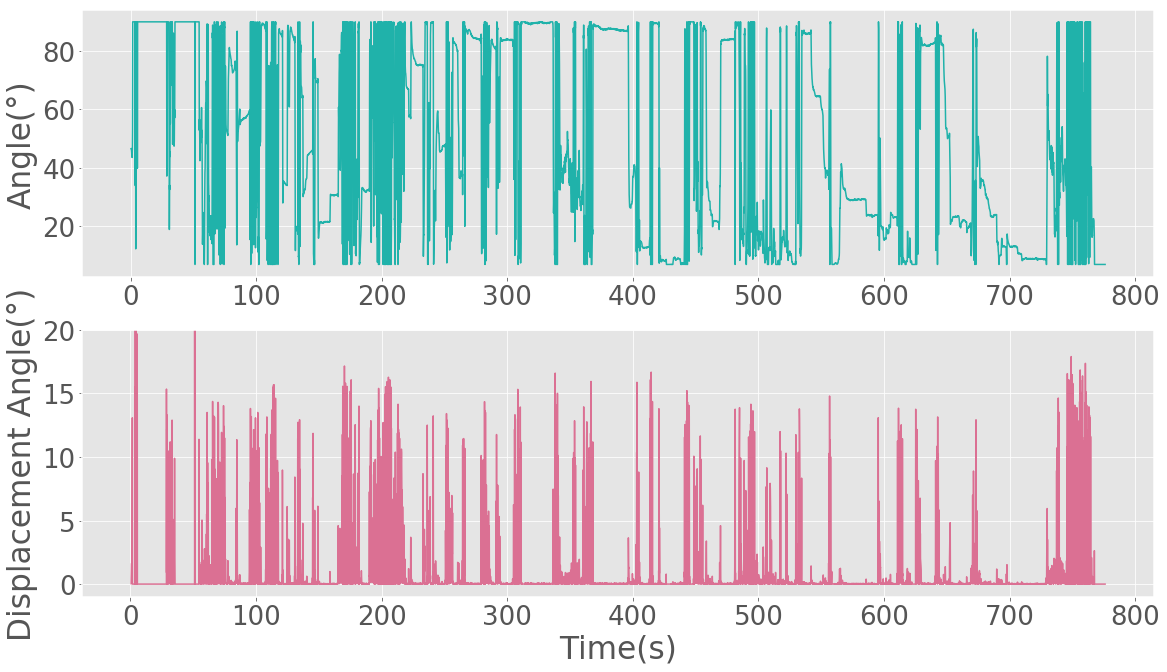

In [24]:
plt.subplot(2,1,1)
plt.plot(df.index,df.Angle,'lightseagreen')
plt.ylabel("Angle(°)")
#plt.ylim(-10,95)
#plt.xlim(100,150)

plt.subplot(2,1,2)
plt.plot(df.index,df.Fabs,'palevioletred')
plt.ylabel("Displacement Angle(°)")
plt.xlabel("Time(s)")
plt.ylim(-1,20)
#plt.xlim(100,150)



(100, 150)

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


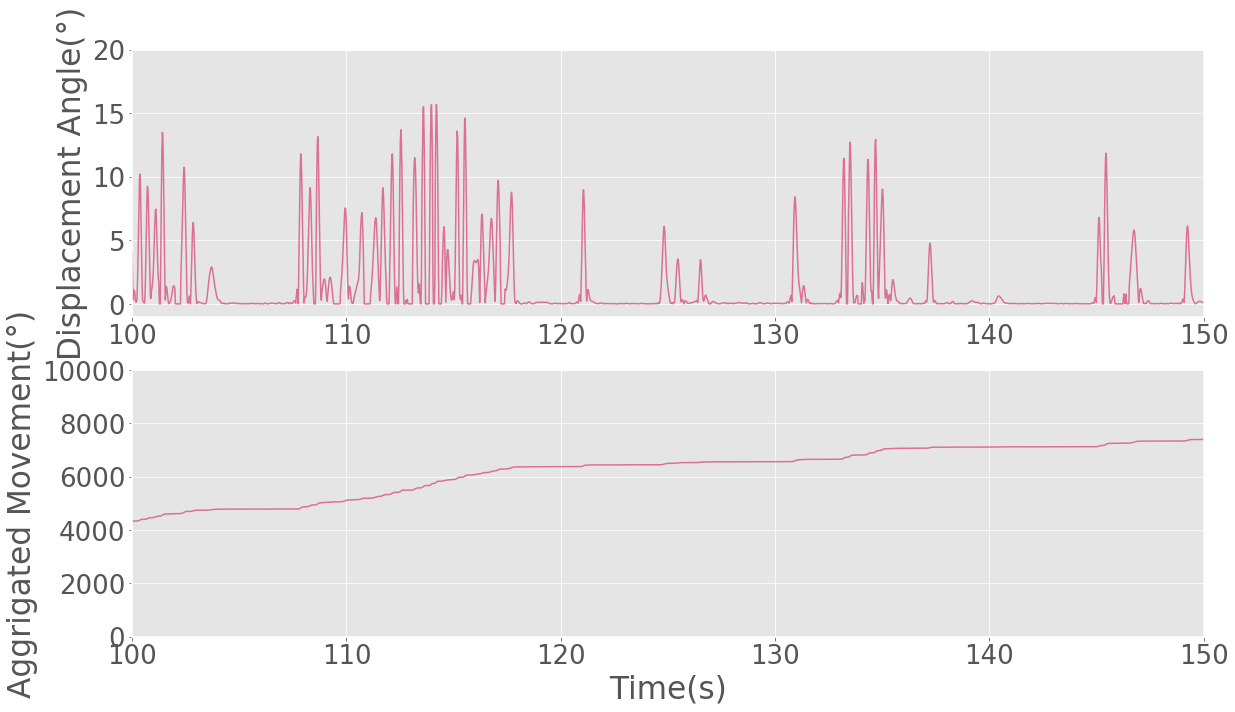

In [25]:
plt.subplot(2,1,1)
plt.plot(df.index,df.Fabs,'palevioletred')
plt.ylabel("Displacement Angle(°)")
plt.ylim(-1,20)
plt.xlim(100,150)

plt.subplot(2,1,2)
plt.plot(df.index,df.Sum,'palevioletred')
plt.ylabel("Aggrigated Movement(°)")
plt.xlabel("Time(s)")
plt.ylim(0,10000)
plt.xlim(100,150)